## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')

<Figure size 792x504 with 0 Axes>

In [26]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
df=pd.read_csv('datasets/office_episodes.csv')
print(df.head(1).T)
print(df.info())

                                                                0
episode_number                                                  0
season                                                          1
episode_title                                               Pilot
description     The premiere episode introduces the boss and s...
ratings                                                       7.5
votes                                                        4936
viewership_mil                                               11.2
duration                                                       23
release_date                                           2005-03-24
guest_stars                                                   NaN
director                                               Ken Kwapis
writers          Ricky Gervais |Stephen Merchant and Greg Daniels
has_guests                                                  False
scaled_ratings                                            0.28125
<class 'pa

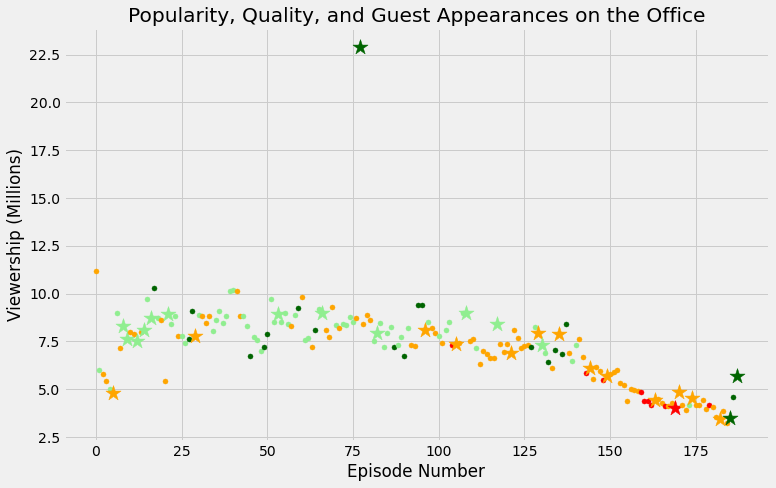

In [27]:
color=[]
for ind,row in df.iterrows():
    if row['scaled_ratings']<0.25:
        color.append('red')
    elif row['scaled_ratings']>=0.25 and row['scaled_ratings']<0.50:
        color.append('orange')
    elif row['scaled_ratings']>=0.50 and row['scaled_ratings']<0.75:
        color.append('lightgreen')
    else:
        color.append('darkgreen')

size=[]
for ind,row in df.iterrows():
    if row['has_guests']==True:
        size.append(250)
        plt.scatter(row['episode_number'],row['viewership_mil'],c=color[ind],s=size[ind],marker='*')
    else:
        size.append(25)
        plt.scatter(row['episode_number'],row['viewership_mil'],c=color[ind],s=size[ind])
        
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

In [28]:
df[df['viewership_mil']==df['viewership_mil'].max()]['guest_stars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [29]:
top_star='Jessica Alba'